## Advanced Twarc2 search analysis with plotly 

Import libraries and files

In [269]:
import pandas as pd
import plotly.express as px
import kaleido
from os.path import join
src = ".../Updates/"
hashtag = ('IchBinHanna')

hashtag1 = ('IchBinHanna')
hashtag2 = ('WissZeitVG')
hashtag3 = ('ACertainDegreeOfFlexibility')

# df # Show example

### Create a plotly line figure for one dataset

Now we group, organize and sort the data in a dictionary that can be read through plotly. Note that we load time based on seconds.
Define the subset, group and aggregate and reset index in one step. Key procedure: first group, then count. You can reset frequencies= {"M", "A", "Q", "BM", "BA", "BQ", "W", "H", "m"}. This will give alternative time series for the zoom. Note however that it makes no sense to go beyond hours because the dataframe would grow drastically (see print below). You might want to use type to groupby particular types of tweets, e.g. RT or replied_to. But you need new dataframes for this.

In [311]:
#from tzlocal import get_localzone

df = pandas.read_csv(join(src, '{}.csv'.format(hashtag1)), dtype='str', parse_dates=['created_at'])
df['created_at'] = df['created_at'].dt.tz_convert('Europe/Berlin')

df['dates'] = pd.to_datetime(df['created_at'].astype('datetime64[ns]').dt.tz_localize('UTC').dt.tz_convert('Europe/Berlin').dt.tz_localize(None))


# Set cut_off
date_cutoff = pd.to_datetime('2021-06-07')
df = df[['dates', 'conversation_id']].groupby([pd.Grouper(key='dates', freq='H')]).agg('count').reset_index()
df= df[df['dates'] >= date_cutoff]
df = df.rename(columns={'conversation_id':'count'})

# print(df) # Show example output

Now we create a plotly graph. We use advanced settings to offer customization for users: a slider and changing information based on the zoom.,

The total tweet count for IchBinHanna is 64333


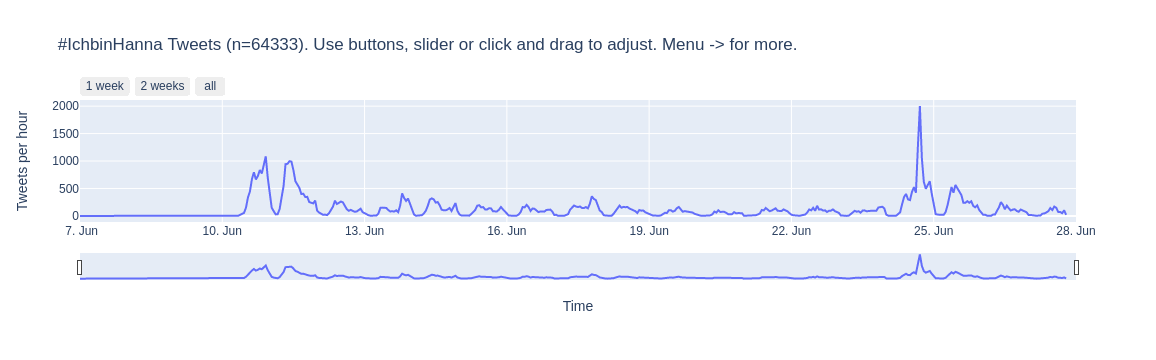

In [320]:
# Print the totals first
print('The total tweet count for', hashtag1, 'is', df['count'].sum())

fig = px.line(
    df,
    x='dates', 
    y='count',
    labels={'dates': 'Time', 'count': 'Tweets per hour'},
    range_x=["2021-06-07", "2021-06-28"], # This is the default start zoom
    title='#IchbinHanna Tweets (n=64333). Use buttons, slider or click and drag to adjust. Menu -> for more.' 
)
fig.update_xaxes(
    rangeslider_visible=True, # Enable slider
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S"),
        dict(dtickrange=[60000, 3600000], value="%H:%M"),
        dict(dtickrange=[3600000, 86400000], value="%e. %b, %H:%M"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b"),
        dict(dtickrange=["M1", "M12"], value="%b '%y"),
        dict(dtickrange=["M12", None], value="%Y")
    ],
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1 week", step="day", stepmode="backward"),
            dict(count=14, label="2 weeks", step="day", stepmode="backward"),
            #dict(count=21, label="3 weeks", step="day", stepmode="backward"),
            # dict(count=1, label="1 month", step="month", stepmode="backward"),
            #dict(count=6, label="6 months", step="month", stepmode="backward"),
            #dict(count=1, label="YTD", step="year", stepmode="todate"),
            #dict(count=1, label="1 year", step="year", stepmode="backward"),
            #dict(count=3, label="3 years", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

In [321]:
import plotly.io as pio
pio.write_html(fig, file='index.html', auto_open=True)